# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
!pip install citipy

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn import datasets
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/juanvalderrama/Desktop/usc-virt-data-pt-03-2021-u-c/06-Python-APIs/Homework/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
new_cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")   
print("-----------------------------")

record_count = 0
set_count = 1
for i in cities: 
    query_url = url + f"q={i}&appid={weather_api_key}&units=imperial"
    response = requests.get(query_url).json()

    
    if record_count > 49:
        record_count = 0
        set_count += 1
    else:
        record_count += 1
    
    print(f"Processing Record {record_count} of Set {set_count} | {i}")
    try: 
#         new_cities.append(i)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        new_cities.append(i)
    except:
        print("City not found. Skipping...")
        pass
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | wukari
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | broome
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | sumbe
Processing Record 9 of Set 1 | bubaque
Processing Record 10 of Set 1 | chernyshevskiy
Processing Record 11 of Set 1 | karkaralinsk
City not found. Skipping...
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | faya
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | san quintin
Processing Record 19 of Set 1 | rumboci
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | grand river sou

Processing Record 36 of Set 4 | aflu
City not found. Skipping...
Processing Record 37 of Set 4 | loandjili
Processing Record 38 of Set 4 | flinders
Processing Record 39 of Set 4 | port lincoln
Processing Record 40 of Set 4 | waddan
Processing Record 41 of Set 4 | oktyabrskoye
Processing Record 42 of Set 4 | port macquarie
Processing Record 43 of Set 4 | pochutla
Processing Record 44 of Set 4 | tigil
Processing Record 45 of Set 4 | talnakh
Processing Record 46 of Set 4 | arroyos y esteros
Processing Record 47 of Set 4 | cedar city
Processing Record 48 of Set 4 | zrenjanin
Processing Record 49 of Set 4 | butaritari
Processing Record 50 of Set 4 | hays
Processing Record 0 of Set 5 | asau
Processing Record 1 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 5 | dwarka
Processing Record 3 of Set 5 | saint-augustin
Processing Record 4 of Set 5 | chokurdakh
Processing Record 5 of Set 5 | nantucket
Processing Record 6 of Set 5 | saint-francois
Processing Record 7 

Processing Record 22 of Set 8 | necochea
Processing Record 23 of Set 8 | millington
Processing Record 24 of Set 8 | nalut
Processing Record 25 of Set 8 | saldanha
Processing Record 26 of Set 8 | le port
Processing Record 27 of Set 8 | nurota
Processing Record 28 of Set 8 | bambous virieux
Processing Record 29 of Set 8 | gornyy
Processing Record 30 of Set 8 | wewak
Processing Record 31 of Set 8 | povenets
Processing Record 32 of Set 8 | dalby
Processing Record 33 of Set 8 | esperance
Processing Record 34 of Set 8 | inirida
Processing Record 35 of Set 8 | strelka
Processing Record 36 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 37 of Set 8 | lolua
City not found. Skipping...
Processing Record 38 of Set 8 | grand gaube
Processing Record 39 of Set 8 | lucapa
Processing Record 40 of Set 8 | san andres
Processing Record 41 of Set 8 | wankaner
Processing Record 42 of Set 8 | saint-leu
Processing Record 43 of Set 8 | mount gambier
Processing Record 44 of Set 8 | wattegama

Processing Record 6 of Set 12 | zhanaozen
Processing Record 7 of Set 12 | khrystynivka
Processing Record 8 of Set 12 | mergui
City not found. Skipping...
Processing Record 9 of Set 12 | novo aripuana
Processing Record 10 of Set 12 | zyryanka
Processing Record 11 of Set 12 | punta de piedra
Processing Record 12 of Set 12 | mpika
Processing Record 13 of Set 12 | komsomolskiy
Processing Record 14 of Set 12 | dromolaxia
Processing Record 15 of Set 12 | warqla
City not found. Skipping...
Processing Record 16 of Set 12 | san cristobal
Processing Record 17 of Set 12 | fairbanks
Processing Record 18 of Set 12 | port hardy
Processing Record 19 of Set 12 | singarayakonda
Processing Record 20 of Set 12 | leo
Processing Record 21 of Set 12 | skovorodino
Processing Record 22 of Set 12 | nhulunbuy
Processing Record 23 of Set 12 | puerto colombia
Processing Record 24 of Set 12 | duzce
Processing Record 25 of Set 12 | morondava
Processing Record 26 of Set 12 | verkhnyaya inta
Processing Record 27 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": new_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
}
weather_df = pd.DataFrame.from_dict(weather_dict)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wukari,7.8500,9.7833,72.79,86,74,3.53,NG,1624484177
1,ushuaia,-54.8000,-68.3000,37.02,80,20,3.44,AR,1624483891
2,dikson,73.5069,80.5464,35.04,92,100,12.88,RU,1624484177
3,port alfred,-33.5906,26.8910,59.50,81,98,11.83,ZA,1624484178
4,hobart,-42.8794,147.3294,51.22,88,0,10.36,AU,1624484178
...,...,...,...,...,...,...,...,...,...
590,kruisfontein,-34.0033,24.7314,56.88,91,100,6.04,ZA,1624484423
591,uthal,25.8072,66.6219,82.92,79,58,7.81,PK,1624484424
592,rize,40.9044,40.8949,52.07,83,57,0.92,TR,1624484425
593,ugoofaaru,5.6667,73.0000,82.15,77,100,13.56,MV,1624484425


In [7]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,5.950000e+02
mean,20.608986,19.110298,69.445395,68.931092,54.112605,7.340555,1.624484e+09
std,32.588771,89.164886,13.908270,21.325053,37.764721,5.074097,8.914833e+01
min,-54.800000,-179.166700,34.050000,8.000000,0.000000,0.000000,1.624484e+09
25%,-4.861400,-58.693500,59.440000,58.000000,20.000000,3.510000,1.624484e+09
50%,22.678300,25.570100,71.290000,74.000000,60.000000,6.310000,1.624484e+09
75%,46.746450,94.939250,80.085000,85.000000,92.000000,10.120000,1.624484e+09
max,78.218600,179.316700,107.440000,100.000000,100.000000,27.630000,1.624484e+09


In [46]:
# Outputting data to csv file
weather_df.to_csv(output_data_file)

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
above_100H = list(weather_df.loc[weather_df['Humidity'] > 100].index)
above_100H

[]

In [51]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.loc[weather_df['Humidity'] <= 100]
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

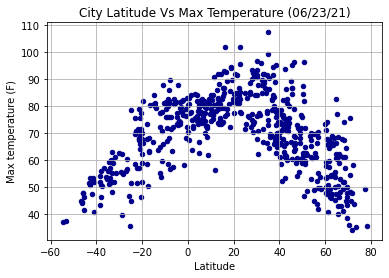

In [12]:
today_date = date.today().strftime("%m/%d/%y")
weather_df.plot(kind='scatter', x='Lat', y='Max Temp', c='DarkBlue')
plt.title(f'City Latitude Vs Max Temperature ({today_date})')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("../Images/LatitudeVsTemperature.png")

## Latitude vs. Humidity Plot

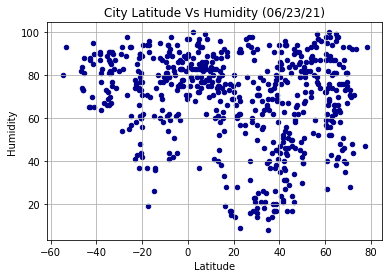

In [13]:
weather_df.plot(kind='scatter', x='Lat', y='Humidity', c='DarkBlue')
plt.title(f'City Latitude Vs Humidity ({today_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig("../Images/LatitudeVsHumidity.png")

## Latitude vs. Cloudiness Plot

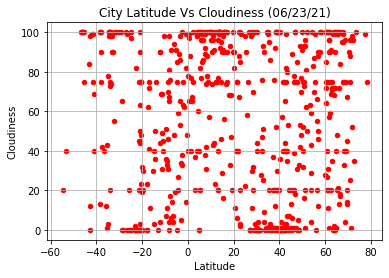

In [14]:
weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', c='Red')
plt.title(f'City Latitude Vs Cloudiness ({today_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig("../Images/LatitudeVsCloudiness.png")

## Latitude vs. Wind Speed Plot

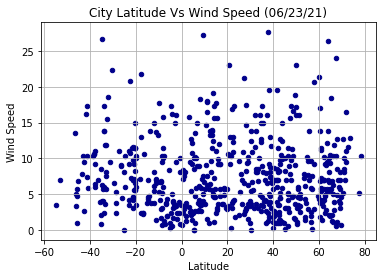

In [15]:
weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', c='DarkBlue')
plt.title(f'City Latitude Vs Wind Speed ({today_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("../Images/LatitudeVsWindSpeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6497698670777248


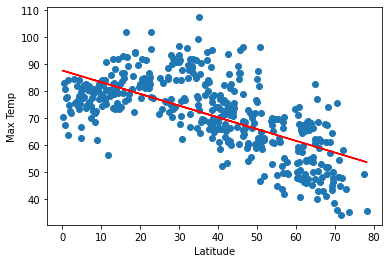

In [27]:
northern_hemi_df = weather_df.loc[weather_df['Lat'] > 0]
y_values = northern_hemi_df['Max Temp']
x_values = northern_hemi_df['Lat']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7953341933394483


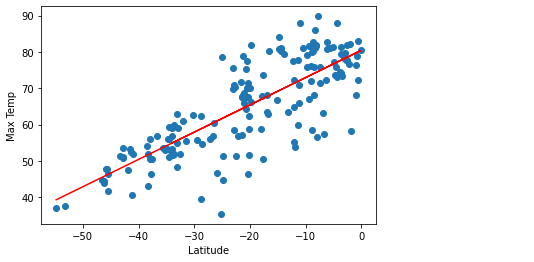

In [32]:
southern_hemi_df = weather_df.loc[weather_df['Lat'] < 0]
y_values = southern_hemi_df['Max Temp']
x_values = southern_hemi_df['Lat']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.05955832328969902


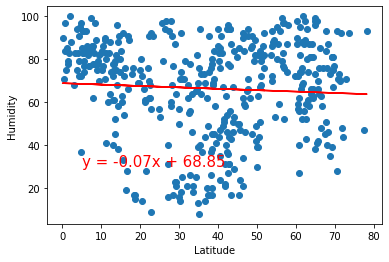

In [30]:
northern_hemi_df = weather_df.loc[weather_df['Lat'] > 0]
y_values = northern_hemi_df['Humidity']
x_values = northern_hemi_df['Lat']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.10148095609429084


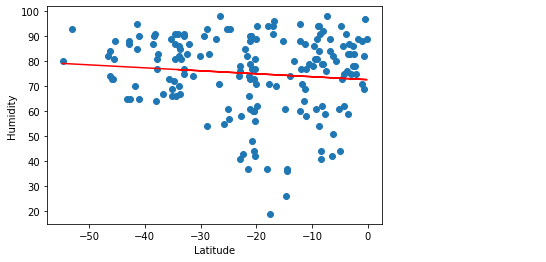

In [33]:
southern_hemi_df = weather_df.loc[weather_df['Lat'] < 0]
y_values = southern_hemi_df['Humidity']
x_values = southern_hemi_df['Lat']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.13713281402312005


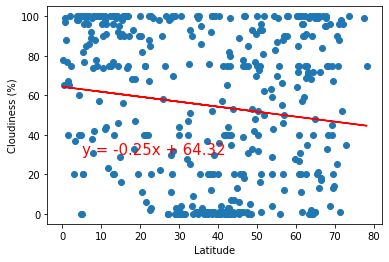

In [34]:
northern_hemi_df = weather_df.loc[weather_df['Lat'] > 0]
y_values = northern_hemi_df['Cloudiness']
x_values = northern_hemi_df['Lat']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.20757244320135088


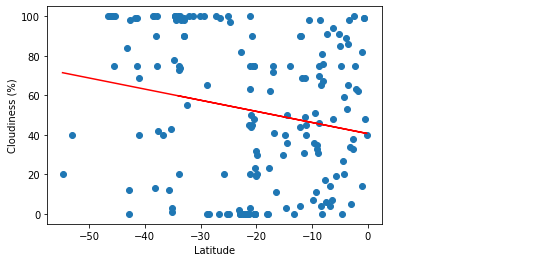

In [36]:
southern_hemi_df = weather_df.loc[weather_df['Lat'] < 0]
y_values = southern_hemi_df['Cloudiness']
x_values = southern_hemi_df['Lat']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.02145937522872054


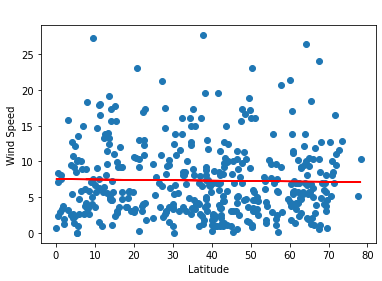

In [37]:
northern_hemi_df = weather_df.loc[weather_df['Lat'] > 0]
y_values = northern_hemi_df['Wind Speed']
x_values = northern_hemi_df['Lat']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.17974729433440162


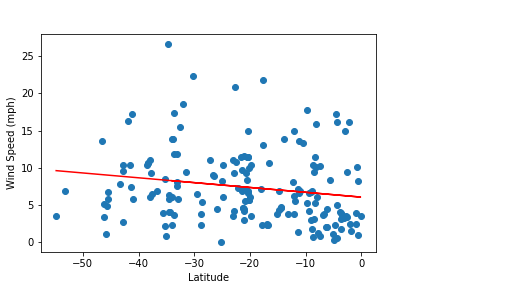

In [39]:
southern_hemi_df = weather_df.loc[weather_df['Lat'] < 0]
y_values = southern_hemi_df['Wind Speed']
x_values = southern_hemi_df['Lat']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()